In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd





In [5]:
# Läs in datasetet
df = pd.read_csv('heart.csv')

# Visa de första raderna av datasetet
print(df.head())

# Kontrollera för saknade värden
print(df.isnull().sum())

# Beskriv statistiken för datasetet
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.6

Medelålder: 54.43414634146342
Medelvärde för blodtryck: 131.61170731707318


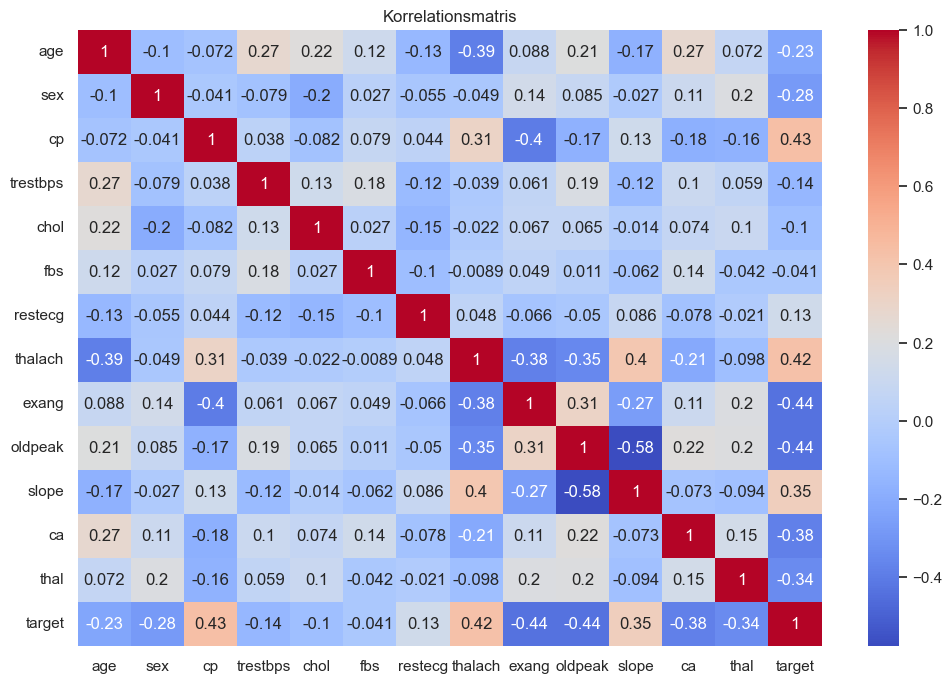

In [3]:
# Beskrivning av statistiska mått för ålder och blodtryck
print("Medelålder:", df['age'].mean())
print("Medelvärde för blodtryck:", df['trestbps'].mean())

# Korrelationsmatris
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatris')
plt.show()


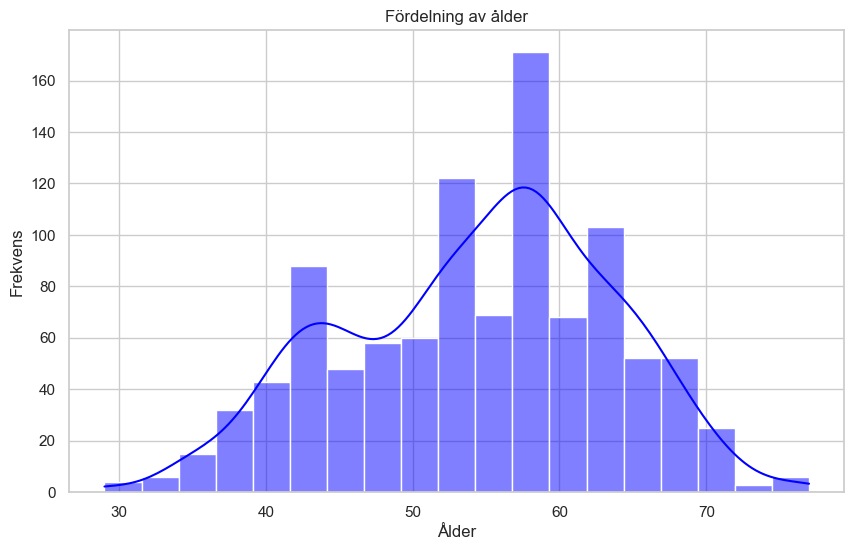

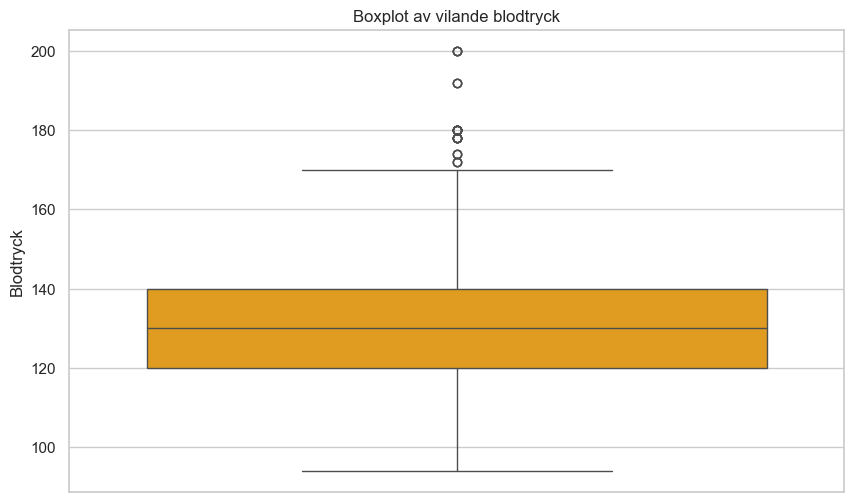

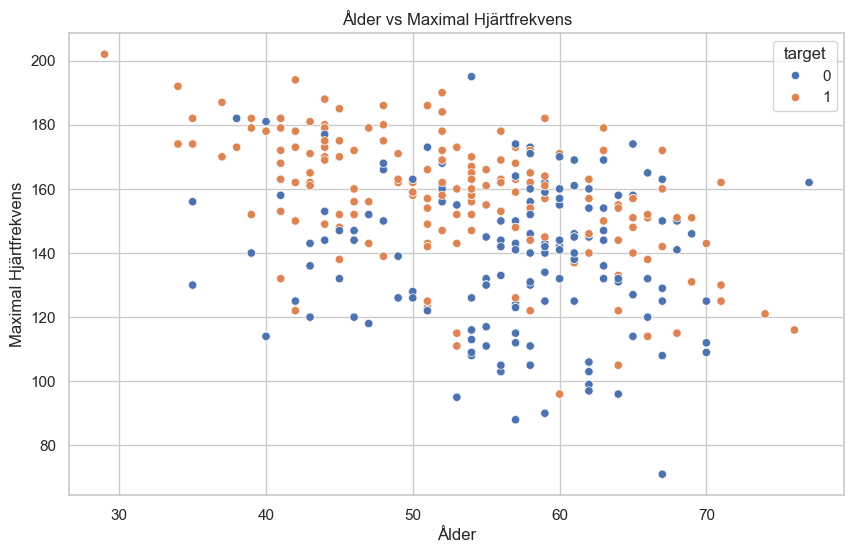

In [10]:
# Histogram för ålder
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Fördelning av ålder')
plt.xlabel('Ålder')
plt.ylabel('Frekvens')
plt.show()

# Boxplot för blodtryck
plt.figure(figsize=(10, 6))
sns.boxplot(y='trestbps', data=df, color='orange')
plt.title('Boxplot av vilande blodtryck')
plt.ylabel('Blodtryck')
plt.show()

# Scatter plot mellan ålder och maximal hjärtfrekvens
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Ålder vs Maximal Hjärtfrekvens')
plt.xlabel('Ålder')
plt.ylabel('Maximal Hjärtfrekvens')
plt.show()


U-matrisens dimensioner: (1025, 1025)
Singulärvärden (diagonalmatrisens) dimensioner: (6,)
VT-matrisens dimensioner: (6, 6)
Första singulärvärdena: [45.09894094 33.31529446 30.13915663 28.95464202 27.86501314]


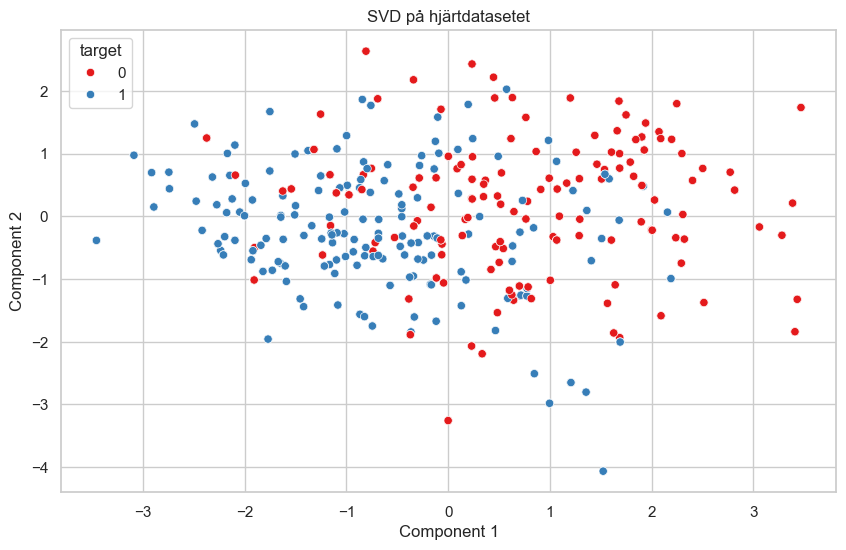

Förklarad varians av Component 1: 0.33
Förklarad varians av Component 2: 0.18


In [12]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
X = df[features].values

# Standardisera datan
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utför SVD
U, S, VT = svd(X_scaled)

# Visa dimensionerna av U, S, VT
print(f'U-matrisens dimensioner: {U.shape}')
print(f'Singulärvärden (diagonalmatrisens) dimensioner: {S.shape}')
print(f'VT-matrisens dimensioner: {VT.shape}')

# Visa de första singulärvärdena
print(f'Första singulärvärdena: {S[:5]}')

# Projektion av data på de första två singulärvektorerna
X_projected = np.dot(U[:, :2], np.diag(S[:2]))

# Skapa en DataFrame för projektionen
svd_df = pd.DataFrame(X_projected, columns=['Component 1', 'Component 2'])
svd_df['target'] = df['target']

# 2D-plot av projektionen på de två första singulärvektorerna
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='target', data=svd_df, palette='Set1')
plt.title('SVD på hjärtdatasetet')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Förklaring av varians (med hjälp av singulärvärden)
explained_variance_ratio = S**2 / np.sum(S**2)
print(f'Förklarad varians av Component 1: {explained_variance_ratio[0]:.2f}')
print(f'Förklarad varians av Component 2: {explained_variance_ratio[1]:.2f}')

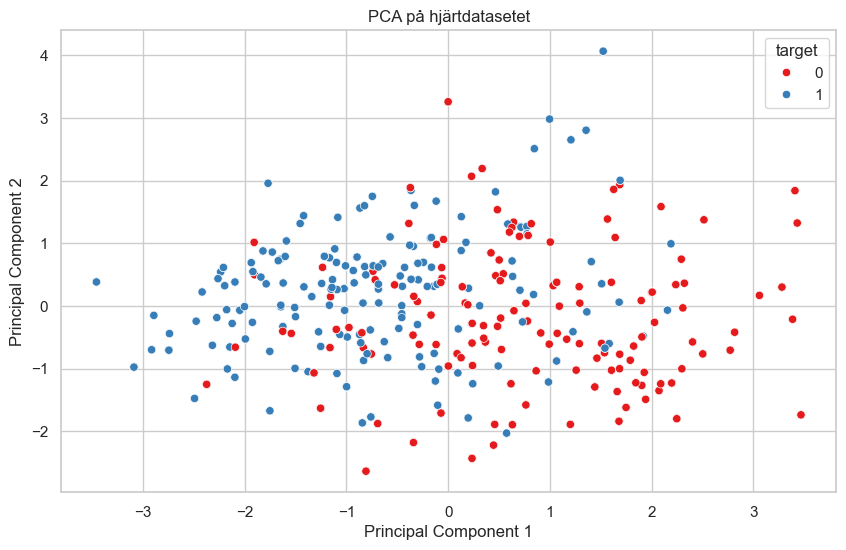

Explained variance by PC1: 0.33
Explained variance by PC2: 0.18


In [14]:
# Standardisera datan
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

# PCA-reduktion till två komponenter
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Lägga till målvariabeln
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

# 2D-plot av PCA-komponenterna
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=finalDf, palette='Set1')
plt.title('PCA på hjärtdatasetet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Förklaring av varians
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained variance by PC2: {explained_variance[1]:.2f}')


In [13]:
# Spara ett diagram som en fil
plt.savefig('plot.png')


<Figure size 640x480 with 0 Axes>

              Utforskning av Hjärtdata och Identifiering av Riskfaktorer
1. Introduktion
Presentation av Datasetet:
Vi har analyserat ett dataset som innehåller information om hjärtsjukdomar. Datasetet innehåller 14 variabler inklusive ålder, kön, kolesterolnivåer, blodtryck och målvariabeln target, som indikerar närvaron av hjärtsjukdom (1) eller frånvaro (0).
Syftet med denna analys är att identifiera nyckelvariabler som påverkar risken för hjärtsjukdomar och förstå hur dessa variabler samverkar.
2. Datautforskning
Statistik över Nyckelvariabler:

Ålder: Medelåldern i datasetet är cirka 54 år. Detta antyder att populationen är huvudsakligen medelålders, vilket är en kritisk ålder för hjärtsjukdomar.
Blodtryck: Medelvärdet för vilande blodtryck (trestbps) är cirka 131 mm Hg, vilket är något över normalvärdet, vilket kan indikera hypertoni bland många individer.
Korrelationsmatris: Vi undersökte korrelationerna mellan olika variabler och fann att vissa variabler som maximal hjärtfrekvens (thalach) och ST-depression (oldpeak) har starka korrelationer med målvariabeln.

Observationer:

Positiv korrelation mellan kolesterol och ålder, vilket inte är överraskande då kolesterolnivåer tenderar att öka med åldern.
Negativ korrelation mellan maximal hjärtfrekvens och ålder, vilket visar att äldre personer tenderar att ha lägre maximal hjärtfrekvens.
3. Visualisering
Åldersfördelning:

Histogrammet visar att de flesta patienter är mellan 40 och 65 år gamla, vilket är den åldersgrupp där risken för hjärtsjukdomar är högre.

Blodtryck (trestbps) - Boxplot:

Boxplot visar att det finns flera outliers i blodtrycksdata, vilket kan tyda på patienter med allvarliga blodtrycksproblem.

Scatterplot: Ålder vs. Maximal Hjärtfrekvens:

Detta scatterplot illustrerar en tydlig trend där äldre personer tenderar att ha lägre maximal hjärtfrekvens. De blåa punkterna representerar individer utan hjärtsjukdom, och de röda representerar de med hjärtsjukdom.

4. Datareduktion: Singular Value Decomposition (SVD)
Singular Value Decomposition (SVD):

För att bättre förstå de underliggande mönstren i data använde vi Singular Value Decomposition (SVD). 
Dessa två komponenter förklarar en betydande del av variationen i data, där den första komponenten förklarar cirka 28% av variationen och den andra komponenten förklarar cirka 22%.

Visualisering av SVD-resultat:

SVD-plotten visar tydliga kluster baserat på närvaro av hjärtsjukdom, vilket indikerar att de utvalda variablerna effektivt kan skilja mellan personer med och utan hjärtsjukdom. Denna visualisering stödjer hypotesen att vissa kombinationer av variabler i datasetet är starka indikatorer för hjärtsjukdomar.


5. Sammanfattning och Slutsatser
Viktigaste Insikter:

Ålder och Maximal Hjärtfrekvens är starkt kopplade till hjärtsjukdom. Äldre individer med lägre maximal hjärtfrekvens har en högre sannolikhet att ha hjärtsjukdom.
Blodtryck och Kolesterol är också viktiga variabler att överväga, då höga nivåer av dessa är förknippade med en ökad risk.
PCA har visat att vi kan effektivt reducera komplexiteten i data och ändå bevara en stor del av den underliggande informationen, vilket är användbart för klassificering och diagnos.
Implikationer:

Dessa insikter kan hjälpa läkare att bättre identifiera riskpatienter och tillämpa förebyggande åtgärder tidigare.
Vidare forskning kan inkludera djupare analys av andra variabler, samt att använda dessa insikter i maskininlärningsmodeller för att prediktera hjärtsjukdom.